Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Haitham Alhad Hyder"
COLLABORATORS = ""

---

# CS110 Pre-class Work 5.2

## Question 1.
Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

<img src="Partition_illustration.jpeg" width="auto" height="100%">

According to the illustration the final value of `i` is $5$ in a _zero based indexing system_. While the final value of `A` is `[1, 5, 6, 2, 3, 4, 7, 8, 9]`

## Question 2.
Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [2]:
from typing import List

def partition(A: List, p: int, r: int) -> int:
    """
    Partitions the array around a pivot whereby the values below the pivot are less than or equal to the pivot

    Input:
        A: The array to partition
        p: The starting index where the partitioning should begin; p >= 0
        r: The ending index where the partitioning should end; r < len(A)
    
    Outputs:
        The index of the pivot
    """
    pivot = A[r]
    i = p - 1
    for j in range(p, r):
        if A[j] <= pivot:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i + 1], A[r] = A[r], A[i + 1]
    return i + 1

In [3]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3.

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [4]:
from typing import List

def quick_sort(A: List, p: int, r: int) -> List:
    """
    Uses the quick sort algorithm to sort the import array

    Input:
        A: The array to partition
        p: The starting index where the partitioning should begin; p >= 0
        r: The ending index where the partitioning should end; r < len(A) 

    Outputs:
        The sorted list
    """

    if p < r:
        q = partition(A, p, r)
        quick_sort(A, p, q - 1)
        quick_sort(A, q + 1, r)

    return A

In [5]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

In [6]:
import unittest

class TestPreClass_5_2(unittest.TestCase):

    def test_parition(self):
        A = [2, 8, 7, 1, 3, 5, 6, 4]
        self.assertEqual(
            partition(A = A, p = 0, r = len(A) - 1),
            3  # Expected output
        )

    def test_quick_sort(self):
       A = [2, 8, 7, 1, 3, 5, 6, 4]
       self.assertEqual(
           quick_sort(A, 0, len(A) - 1),
           [1, 2, 3, 4, 5, 6, 7, 8]
       ) 


tests = TestPreClass_5_2()

tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)

unittest.TextTestRunner().run(tests_loaded)

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

## Question 4. 
Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


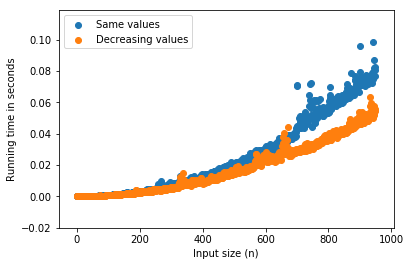

In [7]:
import matplotlib.pyplot as plt
import time

input_sizes = range(950)

### Same values
same_values = [[x for d in range(x+1)] for x in input_sizes]
"""Produce value in the manner: [ [0], [1,1], [2, 2, 2], ...]"""
same_value_run_times = []

for data in same_values:
    start = time.time()
    quick_sort(data, 0, len(data) - 1)
    same_value_run_times.append(time.time() - start)

%matplotlib inline
plt.scatter(
    x= list(input_sizes),
    y = same_value_run_times,
    label = "Same values"
)


### Decreasing order times
decreasing_values = [[d for d in range(x, -1, -1)] for x in input_sizes]
"""Produce value in the manner: [ [0], [1,0], [2, 1, 0], ...]"""
decreasing_value_run_times = []

for data in decreasing_values:
    start = time.time()
    quick_sort(data, 0, len(data) - 1)
    decreasing_value_run_times.append(time.time() - start)

plt.scatter(
    x= list(input_sizes),
    y = decreasing_value_run_times,
    label = "Decreasing values"
)


plt.title = "Analysis of the quick sort algorithm"
plt.ylabel("Running time in seconds")
plt.xlabel("Input size (n)")
plt.legend()